# Support Vector Machine
Originally invented by Vladimir N. Vapnik and Alexey Ya. Chervonenkis in 1963, Support Vector Machine is a supervised machine learning algorithm. SVM can be used for both classification and regresion but it is mostly used for classification problems. We will also learn here to use SVM for solving classification problem. 

## Preparing Necessary Tools

### 1. Installing Necessary Packages
We will be implementing SVM algorithm through Python.Before that, we need to install some packages that we will be need to use. We will need NumPy for array manipulation. Matplotlib will be used to for graphical outputs.SciPy provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization. Scikit-learn is built on NumPy, SciPy, and matplotlib and is used for data analysis and data mining. We will implement SVM through it.

In [3]:
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install scikit-learn

###  2. Importing required packages
After installing the packages we need to import them to be able to use them.

In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
#import seaborn as sns; sns.set()

#from scipy import stats
from sklearn.svm import SVC 
from sklearn import svm,datasets
#from sklearn.model_selection import GridSearchCV 

  ## Let's Start     

We will start by creating our own data to train our SVM classifier. We have 12 data now. See the example at your left and do the exercises. Take hints if you get stuck some where.

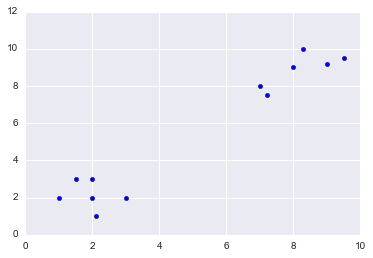

In [10]:
x = [1, 2, 2.1, 3, 2, 1.5, 7, 8, 9.5, 7.2, 9,  8.3]
y = [2, 2, 1,   2, 3, 3,   8, 9, 9.5, 7.5, 9.2, 10]
plt.scatter(x,y)
plt.show()

We will use x and y to make our feature vector and label the first half '0' and other half '1'. In the figure the cluster near zero represent class '0' and the other cluster represents class '1'.

In [11]:
X = np.array([[1,2],[2,2],[2.1,1],[3,2],[2,3],[1.5,3],[7,8],[8,9],[9.5,9.5],[7.2,7.5],[9,9.2],[8.3,10]])
Y = [0,0,0,0,0,0,1,1,1,1,1,1]


We now use our data to train our classifier. The gamma parameter that we used defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

Now we will test our model by feeding it different data and check in which class our data fall. 

In [15]:
#Defining SVM classifier
simple_svm = svm.SVC(kernel='linear', C = 1.0,gamma = 0)

#Training the classifier
simple_svm.fit(X,Y)

#Testing the classifier
print("Class =",simple_svm.predict([6,7.6]))


Class = [1]


**Now check the model yoursel to find class having feature (1,4.7). Click in the <span class="mark">' + '</span> button if you need hint. Compare your answer by clicking in <span class="girk">'Show Solution'</span> button. **

 <span class="girk"><span class="mark">Use simple_svm.predict() to find the value and 
 use print to display the result. Your answer should be [0]</span></span>

In [ ]:
#Enter your code here




In [16]:
print("Class =",simple_svm.predict([1,4.7]))

Class = [0]


The coefficients given by **'svm.coef__'** are  the coordinates of a vector which is orthogonal to the hyperplane that separates the two classes. We will use the vector to calculate the slope of line given by our SVM classifier and then use it to plot the line. 

a =  [ 0.20619334  0.20617664]


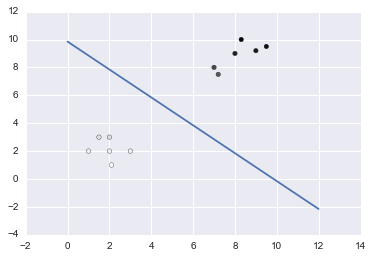

In [14]:
a = simple_svm.coef_[0]
print("a = ", a)

#Calculating slope 
w = -a[0] / a[1]

xx = np.linspace(0,12)

# Equation of the line that separates the classes
yy = w * xx - simple_svm.intercept_[0] / a[1]

plt.plot(xx, yy)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

The blue line is the hyperplane that separates our data into two classes. Now we will use  real data to train and test our classifier.

## SVM With Real Data

 In this section we will see an example of SVM classifier using real data (iris dataset) than we will do an exercise where we will build our own  classifier to find malignant or benign cancer. 
 
 NOTE: Use **triangular icon** at bottom right to try the codes separately. 

### Example: This data sets consists of 3 different types of irises:

1.Setosa,

2.Versicolour,

3.Virginica 


Petal and sepal length, stored in a 150x4 numpy array.

The rows being the samples. 

And the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.



### Exercise: Use SVM to classify cancer type
We will be using sample of breast cancer databases  obtained from the University of Wisconsin Hospitals.
######    Data Overview:
    Classes:	2 (Malignant(M), Benign(B))
    Samples per class:	212(M), 357(B)
    Samples total:	569
    Dimensionality:	30
    Features:	real, positive
Click in the ' + ' button if you need hint. Compare your answer by clicking in <span class="girk">'Show Solution'</span> button. **

Use **svm.SVC() function to build a SVM classifier 
and feed the classifier X_train and Y_train to train it.
Use X_test and Y_test to check accuracy of model. The model should give 97.1014492754 % accuracy,

In [22]:

#This data sets consists of 3 different types of irises’
#(Setosa, Versicolour, and Virginica) petal and
#sepal length, stored in a 150x4 numpy.ndarray

iris = datasets.load_iris()

#Features 
X = iris.data
#labels: Setosa, Versicolour, and Virginica
Y = iris.target

#We will be dividing the data into two parts. 120 data 
#( both features and labels) will be used 
#to train our SVM classifier and rest ( 30)
#will be used to test our model.


X_train = X[:120]
X_test = X[120:]
#Train and Test Labels
Y_train = Y[:120]
Y_test = Y[120:]


#Now , we will use the our training data to 
#create a SVM classifier.
iris_type = svm.SVC(kernel='linear', C=1,gamma=0)
iris_type.fit(X_train, Y_train)



#After we train our SVM classifier , 
#we test how well it works using our test data.
accuracy = iris_type.score(X_test,Y_test)
print("accuracy = ",accuracy * 100,"%")




accuracy =  86.6666666667 %


In [24]:
cancer = datasets.load_breast_cancer()
#Features 
X = cancer.data
#labels: Malignant or Benign
Y = cancer.target

#We will be dividing the data into two parts. 500 data 
#( both features and labels) will be used 
#to train our SVM classifier and rest ( 69)
#will be used to test our model.

#Train and Test Features
X_train = X[:500]
X_test = X[500:]
#Train and Test Labels
Y_train = Y[:500]
Y_test = Y[500:]

#Write your code here
#Now , we will use the our training data to 
#create a SVM classifier.


#Find Accuracy















In [27]:
#####    Solution    ####

cancer = datasets.load_breast_cancer()
#Features 
X = cancer.data
#labels: Malignant or Benign
Y = cancer.target

#We will be dividing the data into two parts. 500 data 
#( both features and labels) will be used 
#to train our SVM classifier and rest ( 69)
#will be used to test our model.

#Train and Test Features
X_train = X[:500]
X_test = X[500:]
#Train and Test Labels
Y_train = Y[:500]
Y_test = Y[500:]

#Now , we will use the our training data to 
#create a SVM classifier.

cancer_type = svm.SVC(kernel='linear', C=1,gamma=0)
cancer_type.fit(X_train, Y_train)

#After we train our SVM classifier , 
#we test how well it works using our test data.
accuracy = cancer_type.score(X_test,Y_test)
print("accuracy = ",accuracy * 100,"%")

accuracy =  97.1014492754 %


Now, lets change the kernel type to **'rbf'** in the example we used ( Iris type classifier) and look at the impact. The (Gaussian) radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms

In [26]:
iris_type = svm.SVC(kernel='rbf', C=1,gamma=0)
iris_type.fit(X_train, Y_train)
accuracy = iris_type.score(X_test,Y_test)
print("accuracy = ",accuracy * 100,"%")

accuracy =  75.3623188406 %
